In [29]:
import pandas_datareader as web
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt
from scipy.stats import norm

In [11]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()
btc = yf.download('BTC-USD', start=start, end=end)
eth = yf.download('ETH-USD', start=start, end=end)
dash = yf.download('DASH-USD', start=start, end=end)

btc_close = btc['Close']
eth_close = eth['Close']
dash_close = dash['Close']

data = pd.DataFrame({'BTC': btc_close, 'ETH': eth_close, 'DASH': dash_close})
data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BTC,ETH,DASH
Date,,,
2020-01-01,7200.174316,130.802002,41.865791
2020-01-02,6985.470215,127.410179,40.223259
2020-01-03,7344.884277,134.171707,44.021961
2020-01-04,7410.656738,135.069366,46.451866
2020-01-05,7411.317383,136.276779,51.479233
...,...,...,...
2023-06-04,27119.066406,1890.513550,42.634834
2023-06-05,25760.097656,1811.828369,39.175293
2023-06-06,27238.783203,1884.494873,40.094734


<Axes: >

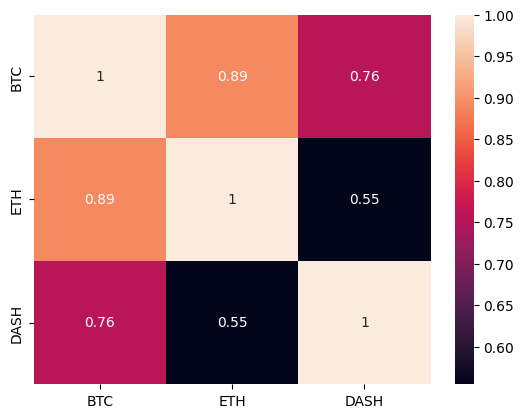

In [13]:
correlation = data.corr()
sns.heatmap(correlation, annot=True)

# Technical Analysis

## Daily Returns

In [26]:
data[['BTC_Daily_Returns', 'ETH_Daily_Returns', 'DASH_Daily_Returns']] = data[['BTC', 'ETH', 'DASH']].pct_change()
data

,BTC,ETH,DASH,MA_20,BTC_MA_20,ETH_MA_20,DASH_MA_20,BTC_EMA_20,ETH_EMA_20,DASH_EMA_20,EMA_20,RSI_14,Cumulative Wealth,BTC_Daily_Returns,ETH_Daily_Returns,DASH_Daily_Returns
Date,,,,,,,,,,,,,,,,
2020-01-01,7200.174316,130.802002,41.865791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.201174e+03,NaN,NaN,NaN
2020-01-02,6985.470215,127.410179,40.223259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.031079e+07,-0.029819,-0.025931,-0.039233
2020-01-03,7344.884277,134.171707,44.021961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.695772e+11,0.051452,0.053069,0.094440
2020-01-04,7410.656738,135.069366,46.451866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.739180e+15,0.008955,0.006690,0.055198
2020-01-05,7411.317383,136.276779,51.479233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.030367e+19,0.000089,0.008939,0.108227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-04,27119.066406,1890.513550,42.634834,27076.708691,27076.708691,1847.730951,42.988866,27076.708691,1847.730951,42.988866,43.129485,47.753950,inf,0.001623,-0.001003,0.000101
2023-06-05,25760.097656,1811.828369,39.175293,27012.881055,27012.881055,1847.116296,42.786111,27012.881055,1847.116296,42.786111,42.752895,36.632099,inf,-0.050111,-0.041621,-0.081144
2023-06-06,27238.783203,1884.494873,40.094734,27004.880078,27004.880078,1850.248059,42.572202,27004.880078,1850.248059,42.572202,42.499737,50.218066,inf,0.057402,0.040107,0.023470


## Moving Average

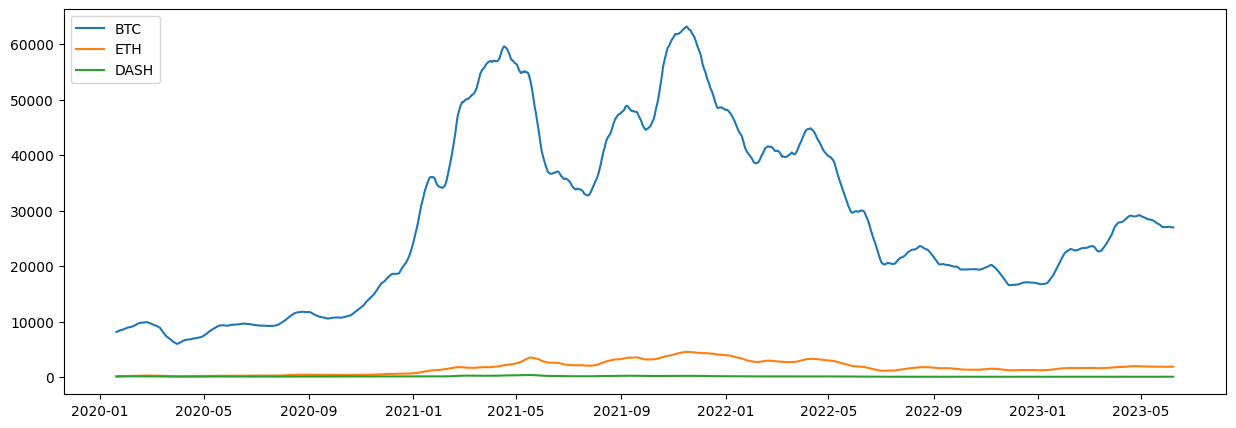

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))

data['BTC_MA_20'] = data['BTC'].rolling(20).mean()
data['ETH_MA_20'] = data['ETH'].rolling(20).mean()
data['DASH_MA_20'] = data['DASH'].rolling(20).mean()

ax.plot(data['BTC_MA_20'], label='BTC')
ax.plot(data['ETH_MA_20'], label='ETH')
ax.plot(data['DASH_MA_20'], label='DASH')

ax.legend(loc='upper left')
plt.show()


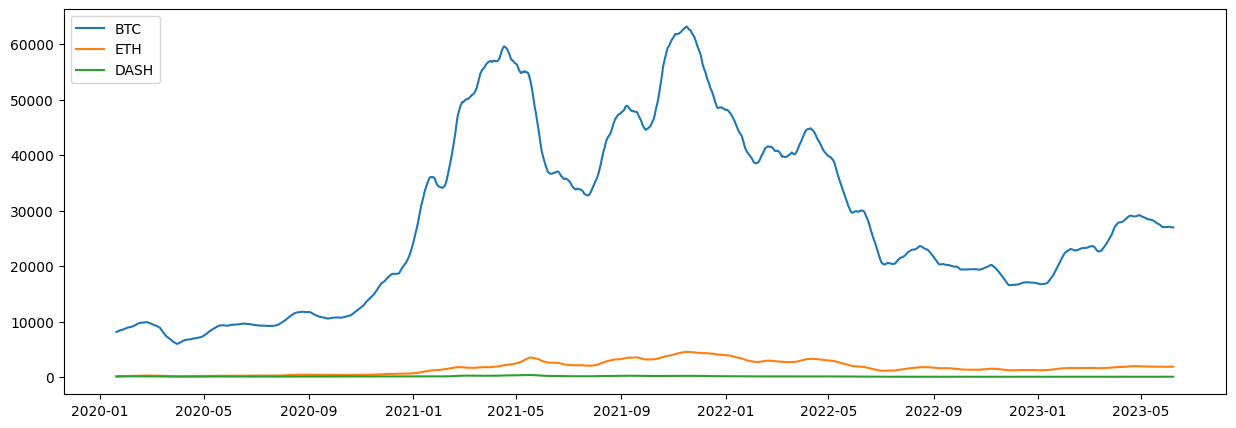

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))

data['BTC_MA_20'] = data['BTC'].rolling(20).mean()
data['ETH_MA_20'] = data['ETH'].rolling(20).mean()
data['DASH_MA_20'] = data['DASH'].rolling(20).mean()

ax.plot(data['BTC_MA_20'], label='BTC')
ax.plot(data['ETH_MA_20'], label='ETH')
ax.plot(data['DASH_MA_20'], label='DASH')

ax.legend(loc='upper left')
plt.show()

## Relative Strenght Index

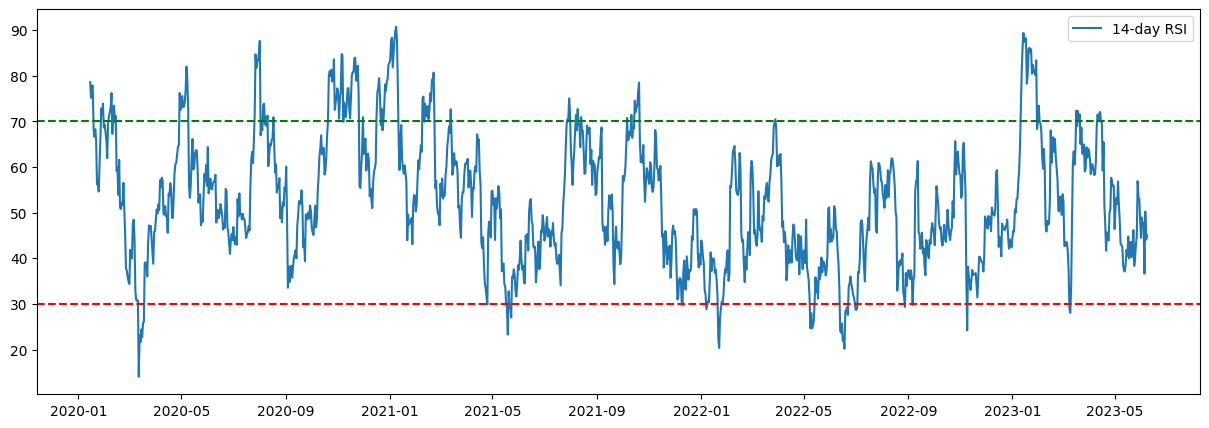

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))
data['RSI_14'] = ta.rsi(data['BTC'], length=14)
plt.plot(data['RSI_14'], label='14-day RSI')
plt.axhline(30, color='red', linestyle='--')
plt.axhline(70, color='green', linestyle='--')
plt.legend()
plt.show()

## Cumulative Wealth

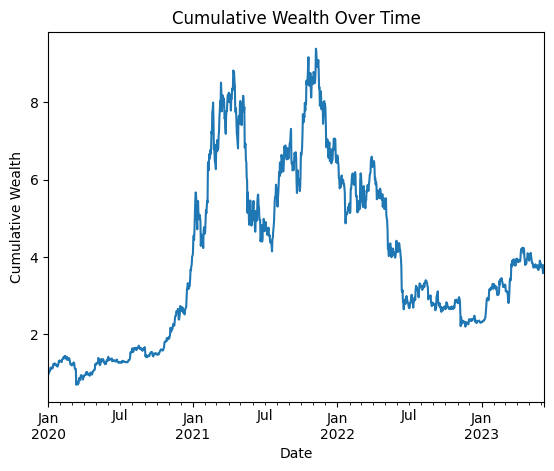

In [27]:
data['Cumulative Wealth'] = (1 + data['BTC_Daily_Returns']).cumprod()
data['Cumulative Wealth'].plot()
plt.title('Cumulative Wealth Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Wealth')
plt.show()

## Moving Average Convergence Divergence 

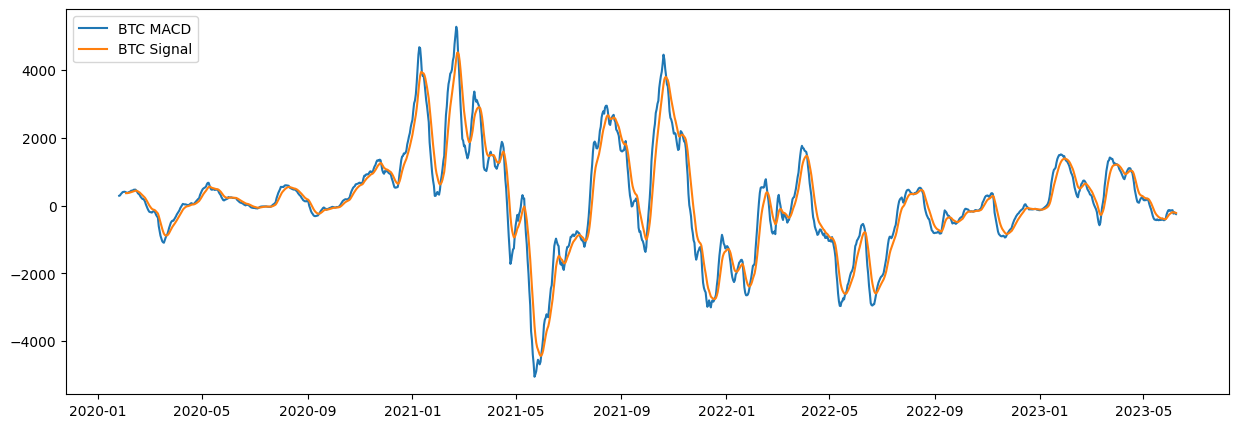

In [32]:
fig, ax = plt.subplots(figsize=(15, 5))
data['BTC_MACD'] = ta.macd(data['BTC'], fast=12, slow=26, signal=9)['MACD_12_26_9']
data['BTC_MACD_Signal'] = ta.macd(data['BTC'], fast=12, slow=26, signal=9)['MACDs_12_26_9']
plt.plot(data['BTC_MACD'], label='BTC MACD')
plt.plot(data['BTC_MACD_Signal'], label='BTC Signal')

plt.legend(loc='upper left')
plt.show()